In [ ]:
크롤링을 하거나 데이터를 받아올 때 겉보기엔 리스트나 딕셔너리 형태지만
해당 타입이 문자열로 되어있어 원하는 데이터에 접근하기 어려운 경우가 빈번하게
생긴다고 한다. 이를 해당하는 파이썬 객체로 알맞게 변형시켜주는 함수는?
    -> literal_eval

SVD는 추천 예측을 해주는 알고리즘으로 행렬분해 해서
사용자들과 아이템들에 대한 각각의 잠재 요인을 분석하여
사용자가 사용하지 않은 아이템에 대한 데이터를 예측한다.

In [14]:
import pandas as pd
df = pd.DataFrame({"UserID" : ['User1', 'User1', 'User2', 'User2', 'User3', 'User4'],
                   "ItemID" : ['Item1', 'Item3', 'Item1', 'Item2', 'Item4', 'Item2'], 
                   "Rating" : [3, 3, 4, 1, 2, 5]}) 
df

,UserID,ItemID,Rating
0,User1,Item1,3
1,User1,Item3,3
2,User2,Item1,4
3,User2,Item2,1
4,User3,Item4,2
5,User4,Item2,5


In [15]:
df.pivot_table(index="UserID", columns='ItemID')

Rating                  
ItemID  Item1 Item2 Item3 Item4
UserID                         
User1     3.0   NaN   3.0   NaN
User2     4.0   1.0   NaN   NaN
User3     NaN   NaN   NaN   2.0
User4     NaN   5.0   NaN   NaN

In [ ]:
추천시스템은 아이템 기반 방식과 협업 필터링 방식으로 나뉜다.

In [ ]:
str = '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'
에서
['Action', 'Adventure', 'Fantasy', 'Science Fiction'] 

In [ ]:
from ast import literal_eval      
dict_series = literal_eval(str)    
[i['name'] for i in dict_series]
이렇게 써주면 이름만 출력한다.

In [ ]:
사람마다 평가를 주는 기준이 다릅니다.
(어떤사람은 짜게, 어떤 사람은 후하게)
이것을 반영하는 평점을 무엇이라고 하는가요?
-> 베이스라인 평점

평점 분석에서 왜곡된 평점 데이터를 회피하도록 평점에 평가횟수를
반영하는 평가 방식이다.
-> 가중 평점

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

text = 'I decided, very early on, just to accept life unconditionally.I never expected it to do anything special for me, yet I seemed to accomplish far more than I had ever hoped. Most of the time it just happened to me withoutmy ever seeking it.' 
text

'I decided, very early on, just to accept life unconditionally.I never expected it to do anything special for me, yet I seemed to accomplish far more than I had ever hoped. Most of the time it just happened to me withoutmy ever seeking it.'

In [20]:
analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores(text) 

{'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'compound': 0.8658}

In [ ]:
Surprise에서 예측을 할떄 predict(), test() 이렇게 2가지로 예측했다.
이 둘의 차이점은?

전체 데이터에 대해 예측할 때 사용하는 test()
개별 유저의 평점을 예측할 때 사용하는 predict() 

In [23]:
import pandas as pd
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import train_test_split

ratings = pd.read_csv('ratings.csv')
reader = Reader(rating_scale = (0.5,5.0)) 
data = Dataset.load_from_df(ratings[['userId','movieId','rating']], reader)
trainset, testset = train_test_split(data, test_size=0.25)
model = SVD(n_epochs=50, n_factors=50) 

In [ ]:
위 코드를 이용하여
사용자 아이디 196번이 예측
아이템 아이디 302번의 예측 평점을 구하기

In [25]:
model.fit(trainset)
pred = model.predict(uid = str(196), iid = str(302))
pred.est

3.500866092797546

In [34]:
from bs4 import BeautifulSoup
from urllib import request
import urllib.request

In [35]:
url = "https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EC%9A%B0%ED%81%AC%EB%9D%BC%EC%9D%B4%EB%82%98"

In [36]:
html = request.urlopen(url).read()
html

b'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="\xec\x9a\xb0\xed\x81\xac\xeb\x9d\xbc\xec\x9d\xb4\xeb\x82\x98 : \xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\x89\xb4\xec\x8a\xa4\xea\xb2\x80\xec\x83\x89"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'\xec\x9a\xb0\xed\x81\xac\xeb\x9d\xbc\xec\x9d\xb4\xeb\x82\x98\'\xec\x9d\x98 \xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\x89\xb4\xec\x8a\xa4\xea\xb2\x80\xec\x83\x89 \xea\xb2\xb0\xea\xb3\xbc\xec\x9e\x85\xeb\x8b\x88\xeb\x8b\xa4."> <meta name="description" lang="ko" content="\'\xec\x9a\xb0\xed\x81\xac\xeb\x9d\xbc\xec\x9d\xb4\xeb\x82\x98\'\xec\x9d\x98 \xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\x89\xb4\xec\x8a\xa4\x

In [37]:
soup = BeautifulSoup(html, 'html.parser')
soup

<!DOCTYPE html>
 <html lang="ko"> <head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="우크라이나 : 네이버 뉴스검색" property="og:title"> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'우크라이나'의 네이버 뉴스검색 결과입니다." property="og:description"/> <meta content="'우크라이나'의 네이버 뉴스검색 결과입니다." lang="ko" name="description"/> <title>우크라이나 : 네이버 뉴스검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_221006.css" rel="stylesheet" type="text/css"/> <link href="https://ssl.pstatic.net

In [38]:
soup.find_all(class_ = "news_tit")

[<a class="news_tit" href="http://www.womennews.co.kr/news/articleView.html?idxno=229198" onclick="return goOtherCR(this, 'a=nws*a.tit&amp;r=1&amp;i=88000589_000000000000000000101145&amp;g=310.0000101145&amp;u='+urlencode(this.href));" target="_blank" title="우크라이나 헤르손 탈환 시도...가장 치열한 전투 예상"><mark>우크라이나</mark> 헤르손 탈환 시도...가장 치열한 전투 예상</a>,
 <a class="news_tit" href="http://news.tvchosun.com/site/data/html_dir/2022/10/27/2022102790031.html" onclick="return goOtherCR(this, 'a=nws*j.tit&amp;r=3&amp;i=88156f73_000000000000000000380089&amp;g=448.0000380089&amp;u='+urlencode(this.href));" target="_blank" title="러, 푸틴 참관 대규모 핵 훈련…&quot;우크라이나 '더러운 폭탄' 우려&quot;">러, 푸틴 참관 대규모 핵 훈련…"<mark>우크라이나</mark> '더러운 폭탄' 우려"</a>,
 <a class="news_tit" href="https://news.kbs.co.kr/news/view.do?ncd=5587218&amp;ref=A" onclick="return goOtherCR(this, 'a=nws*a.tit&amp;r=4&amp;i=88000114_000000000000000011363127&amp;g=056.0011363127&amp;u='+urlencode(this.href));" target="_blank" title="우크라이나, 수백만 해외 피란민에 “올겨울엔 귀국 말

In [39]:
title = soup.find_all(class_ = "news_tit")
title

[<a class="news_tit" href="http://www.womennews.co.kr/news/articleView.html?idxno=229198" onclick="return goOtherCR(this, 'a=nws*a.tit&amp;r=1&amp;i=88000589_000000000000000000101145&amp;g=310.0000101145&amp;u='+urlencode(this.href));" target="_blank" title="우크라이나 헤르손 탈환 시도...가장 치열한 전투 예상"><mark>우크라이나</mark> 헤르손 탈환 시도...가장 치열한 전투 예상</a>,
 <a class="news_tit" href="http://news.tvchosun.com/site/data/html_dir/2022/10/27/2022102790031.html" onclick="return goOtherCR(this, 'a=nws*j.tit&amp;r=3&amp;i=88156f73_000000000000000000380089&amp;g=448.0000380089&amp;u='+urlencode(this.href));" target="_blank" title="러, 푸틴 참관 대규모 핵 훈련…&quot;우크라이나 '더러운 폭탄' 우려&quot;">러, 푸틴 참관 대규모 핵 훈련…"<mark>우크라이나</mark> '더러운 폭탄' 우려"</a>,
 <a class="news_tit" href="https://news.kbs.co.kr/news/view.do?ncd=5587218&amp;ref=A" onclick="return goOtherCR(this, 'a=nws*a.tit&amp;r=4&amp;i=88000114_000000000000000011363127&amp;g=056.0011363127&amp;u='+urlencode(this.href));" target="_blank" title="우크라이나, 수백만 해외 피란민에 “올겨울엔 귀국 말

In [40]:
len(title)

10

In [48]:
type(soup)

bs4.BeautifulSoup

In [47]:
type(title)

bs4.element.ResultSet

soup와 title은 타입이 다르다.

In [46]:
title[0]

<a class="news_tit" href="http://www.womennews.co.kr/news/articleView.html?idxno=229198" onclick="return goOtherCR(this, 'a=nws*a.tit&amp;r=1&amp;i=88000589_000000000000000000101145&amp;g=310.0000101145&amp;u='+urlencode(this.href));" target="_blank" title="우크라이나 헤르손 탈환 시도...가장 치열한 전투 예상"><mark>우크라이나</mark> 헤르손 탈환 시도...가장 치열한 전투 예상</a>

In [41]:
title[0].text

'우크라이나 헤르손 탈환 시도...가장 치열한 전투 예상'

text 뒤에 괄호를 안붙여도 된다.

In [42]:
[tit.text for tit in title]

['우크라이나 헤르손 탈환 시도...가장 치열한 전투 예상',
 '러, 푸틴 참관 대규모 핵 훈련…"우크라이나 \'더러운 폭탄\' 우려"',
 '우크라이나, 수백만 해외 피란민에 “올겨울엔 귀국 말라” 당부',
 '전쟁 피해 한국 온 우크라이나인 뇌출혈…인천시 도움으로 치료',
 '우크라이나 전쟁 후 흑해 돌고래 5만 마리 떼죽음, 왜?',
 '악수하는 독일-우크라이나 대통령',
 '“감당할 수 없다, 귀국하지 마라”...혹독한 겨울 대비 나선 우크라이나',
 '“유럽 천연가스, 우크라이나 전쟁 이전 수준으로 회귀”',
 "'지구안보'의 눈으로 본 우크라이나전쟁",
 '승리의 V 그리는 우크라이나 전차병']

In [43]:
title[0]

<a class="news_tit" href="http://www.womennews.co.kr/news/articleView.html?idxno=229198" onclick="return goOtherCR(this, 'a=nws*a.tit&amp;r=1&amp;i=88000589_000000000000000000101145&amp;g=310.0000101145&amp;u='+urlencode(this.href));" target="_blank" title="우크라이나 헤르손 탈환 시도...가장 치열한 전투 예상"><mark>우크라이나</mark> 헤르손 탈환 시도...가장 치열한 전투 예상</a>

In [44]:
title[0].attrs['href']

'http://www.womennews.co.kr/news/articleView.html?idxno=229198'

In [51]:
title[0].attrs['href']

'http://www.womennews.co.kr/news/articleView.html?idxno=229198'

이렇게 인덱싱으로 바로 접근해도 괜찮다.

In [45]:
for i in title:
    print(i.text, " : ", i.attrs['href'])

우크라이나 헤르손 탈환 시도...가장 치열한 전투 예상  :  http://www.womennews.co.kr/news/articleView.html?idxno=229198
러, 푸틴 참관 대규모 핵 훈련…"우크라이나 '더러운 폭탄' 우려"  :  http://news.tvchosun.com/site/data/html_dir/2022/10/27/2022102790031.html
우크라이나, 수백만 해외 피란민에 “올겨울엔 귀국 말라” 당부  :  https://news.kbs.co.kr/news/view.do?ncd=5587218&ref=A
전쟁 피해 한국 온 우크라이나인 뇌출혈…인천시 도움으로 치료  :  http://www.newsis.com/view/?id=NISX20221026_0002062855&cID=14001&pID=14000
우크라이나 전쟁 후 흑해 돌고래 5만 마리 떼죽음, 왜?  :  https://view.asiae.co.kr/article/2022102614482734312
악수하는 독일-우크라이나 대통령  :  http://www.newsis.com/view/?id=NISI20221026_0001114670
“감당할 수 없다, 귀국하지 마라”...혹독한 겨울 대비 나선 우크라이나  :  https://www.khan.co.kr/world/europe-russia/article/202210261512001
“유럽 천연가스, 우크라이나 전쟁 이전 수준으로 회귀”  :  http://www.edaily.co.kr/news/newspath.asp?newsid=01275926632497184
'지구안보'의 눈으로 본 우크라이나전쟁  :  https://www.pressian.com/pages/articles/2022102616183903030?utm_source=naver&utm_medium=search
승리의 V 그리는 우크라이나 전차병  :  http://www.newsis.com/view/?id=NISI20221027_0001115701


In [56]:
from bs4 import BeautifulSoup
from urllib import request
import urllib.request

url = 'https://search.daum.net/search?w=news&nil_search=btn&DA=NTB&enc=utf8&cluster=y&cluster_page=1&q=%ED%94%84%EB%9E%91%EC%8A%A4'
html = request.urlopen(url).read()
soup = BeautifulSoup(html, 'lxml')
title = soup.find_all(class_ = "news_tit")

len(title)

0

In [ ]:
해보면 길이는 0으로 나온다. 왜일까

In [58]:
soup = BeautifulSoup(html, 'lxml')
soup

<html><head><script type="text/javascript">
location.replace( "https://ncaptcha.search.daum.net/captcha/show?redirect=http%3A%2F%2Fsearch.daum.net%2Fsearch%3Fw%3Dnews%26nil_search%3Dbtn%26DA%3DNTB%26enc%3Dutf8%26cluster%3Dy%26cluster_page%3D1%26q%3D%25ED%2594%2584%25EB%259E%2591%25EC%258A%25A4" );
</script>
</head></html>

In [ ]:
왜 이렇게 나타났을까?

왜냐하면 긁어오는 서버에서 자기 서버에서 가져오는걸 막는다.
사용자인지 침입자인지 구별하기 위해서임.

웹브라우저로 다가가기 위해서는(웹브라우저로 접근한다 등) user agent 로 들어가서
나의 user agent을 확인하여 복사해서 쥬피터에다가 붙여넣어야 한다.

붙여넣기는 아래의 코드 참조하기

In [ ]:
html = request.urlopen(url).read() 게 다가가는건 이제 의미가 없다.
제거하기

In [96]:
import requests

In [97]:
url = 'https://search.daum.net/search?w=news&nil_search=btn&DA=NTB&enc=utf8&cluster=y&cluster_page=1&q=%EB%AF%B8%EA%B5%AD'

In [98]:
header = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36"}

'난 기계가 아니에요.' 를 알려주는게 header

In [99]:
html = requests.get(url, headers = header).text
html #출력값을 보니 정상적으로 가져왔다.

'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<!doctype html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="ko" class="win chrome">\n<head profile="http://a9.com/-/spec/opensearch/1.1/">\n<meta http-equiv="content-Type" content="text/html;charset=utf-8" />\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<meta name="autocomplete" content="off" />\n<meta name="referrer" content="always">\n<meta name="format-detection" content="telephone=no" />\n<meta property="og:title" content="미국 &ndash; Daum 검색" />\n<meta property="og:url" content="https://search.daum.net/search?w=news&q=%EB%AF%B8%EA%B5%AD" />\n<meta property="og:description" content="Daum 검색에서 미국에 대한 최신정보를 찾아보세요." />\n<meta property="og:image" content="https://search1.daumcdn.net/search/statics/common/img/og_search.png" />\n<meta property="og:site_name" content="다음검색" />\n<title>미국 &ndash; Daum 검색</title>\n<link rel="search" type="application/opensearchdescription+xml" href="//search.daum.net/OpenSearch.xml" title="D

In [100]:
soup = BeautifulSoup(html, 'html.parser') 
soup


<!DOCTYPE html>

<html class="win chrome" lang="ko" xmlns="http://www.w3.org/1999/xhtml">
<head profile="http://a9.com/-/spec/opensearch/1.1/">
<meta content="text/html;charset=utf-8" http-equiv="content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="off" name="autocomplete"/>
<meta content="always" name="referrer"/>
<meta content="telephone=no" name="format-detection">
<meta content="미국 – Daum 검색" property="og:title"/>
<meta content="https://search.daum.net/search?w=news&amp;q=%EB%AF%B8%EA%B5%AD" property="og:url"/>
<meta content="Daum 검색에서 미국에 대한 최신정보를 찾아보세요." property="og:description"/>
<meta content="https://search1.daumcdn.net/search/statics/common/img/og_search.png" property="og:image"/>
<meta content="다음검색" property="og:site_name"/>
<title>미국 – Daum 검색</title>
<link href="//search.daum.net/OpenSearch.xml" rel="search" title="Daum" type="application/opensearchdescription+xml"/>
<link charset="utf-8" href="//search1.daumcdn.net/search/statics/common

In [101]:
title = soup.find_all(class_ = "tit_main")
title

[<a class="tit_main fn_tit_u" href="http://v.media.daum.net/v/20221026140906800?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26PqI-u4MHx258F1ae&amp;pg=1&amp;r=1&amp;p=4&amp;rc=10&amp;e1=16iL25JCNSvhQN0hEU&amp;e3=0&amp;ext=dsid=26PqI-u4MHx258F1ae", event, {"cpid": {"value": "16iL25JCNSvhQN0hEU"}});' target="_blank">싱하이밍 대사 "한중관계 가장 큰 외부적 도전은 <b>미국</b>"</a>,
 <a class="tit_main fn_tit_u" href="http://v.media.daum.net/v/20221027030701102?f=o" onclick='smartLog(this, "dc=NNS&amp;d=2621uJ6aLY2j43mVQX&amp;pg=1&amp;r=2&amp;p=4&amp;rc=10&amp;e1=16bOiOx4gG2S18EPLj&amp;e3=0&amp;ext=dsid=2621uJ6aLY2j43mVQX", event, {"cpid": {"value": "16bOiOx4gG2S18EPLj"}});' target="_blank">“한국에서 <b>미국</b> 주립대 학위 받아요.”</a>,
 <a class="tit_main fn_tit_u" href="http://v.media.daum.net/v/20221027091500124?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26L6vEZ4jGwJwsOiMO&amp;pg=1&amp;r=3&amp;p=4&amp;rc=10&amp;e1=16iL25JCNSvhQN0hEU&amp;e3=0&amp;ext=dsid=26L6vEZ4jGwJwsOiMO", event, {"cpid": {"value": "16iL25JCNSvhQN0hEU"}})

"tit_main" 찾는 방법은 오른쪽 눌러서 '검사' 누르기
커서 대고 class 부분 찾기

In [102]:
len(title)

10

In [105]:
for i in title:
    print(i.text)

싱하이밍 대사 "한중관계 가장 큰 외부적 도전은 미국"
“한국에서 미국 주립대 학위 받아요.”
김정은, 미국선거 노리고 7차 핵실험 버튼 누르나
중간선거, 미국의 선택은
캐나다가 먼저 금리인상 속도조절 나섰다…미국도 추종할까?
[표] 국내투자자 미국 주식투자 상위 종목(26일)
"미국도 얼어붙었다"…美 새집 판매 뚝 떨어졌다
싱하이밍 “북핵 묵인 안 해”…미국엔 작심 비판
트럼프 천기누설…언론인에게 '미국 비밀 핵무기' 브리핑
미국 법무부, 오거스타내셔널·USGA·PGA 오브 아메리카도 반독점 조사


In [ ]:
#다른 방법으로 해보기

In [ ]:
find_all은 여러개를 다 찾지만
find는 딱 하나만 찾아준다.

select라고 치면 다 찾고
select_one이라고 하면 하나만 찾아준다.

find는 class_라고 쳐야 했지만
select는 class_ 대신 .(점)을 앞에 써줘야한다.
#(샵)은 id를 뜻한다.

만약 select를 사용하려 하는데 변수에 띄어쓰기가 있을 경우 (예를 들어 'tit_main fn_tit_u')
띄어쓰기에 .을 추가하면 된다.
여기서 .은 빈공간이라는 뜻이다.

In [110]:
title = soup.select(".tit_main")
title

[<a class="tit_main fn_tit_u" href="http://v.media.daum.net/v/20221026140906800?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26PqI-u4MHx258F1ae&amp;pg=1&amp;r=1&amp;p=4&amp;rc=10&amp;e1=16iL25JCNSvhQN0hEU&amp;e3=0&amp;ext=dsid=26PqI-u4MHx258F1ae", event, {"cpid": {"value": "16iL25JCNSvhQN0hEU"}});' target="_blank">싱하이밍 대사 "한중관계 가장 큰 외부적 도전은 <b>미국</b>"</a>,
 <a class="tit_main fn_tit_u" href="http://v.media.daum.net/v/20221027030701102?f=o" onclick='smartLog(this, "dc=NNS&amp;d=2621uJ6aLY2j43mVQX&amp;pg=1&amp;r=2&amp;p=4&amp;rc=10&amp;e1=16bOiOx4gG2S18EPLj&amp;e3=0&amp;ext=dsid=2621uJ6aLY2j43mVQX", event, {"cpid": {"value": "16bOiOx4gG2S18EPLj"}});' target="_blank">“한국에서 <b>미국</b> 주립대 학위 받아요.”</a>,
 <a class="tit_main fn_tit_u" href="http://v.media.daum.net/v/20221027091500124?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26L6vEZ4jGwJwsOiMO&amp;pg=1&amp;r=3&amp;p=4&amp;rc=10&amp;e1=16iL25JCNSvhQN0hEU&amp;e3=0&amp;ext=dsid=26L6vEZ4jGwJwsOiMO", event, {"cpid": {"value": "16iL25JCNSvhQN0hEU"}})

In [ ]:
# 검사 -> copy -> selector을 눌렀다.

#newsColl > div.cont_divider > ul > li:nth-child(1) > div.wrap_cont > a

In [114]:
title = soup.select("#newsColl > div.cont_divider > ul > li:nth-child(1) > div.wrap_cont > a")
title

[<a class="tit_main fn_tit_u" href="http://v.media.daum.net/v/20221026140906800?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26PqI-u4MHx258F1ae&amp;pg=1&amp;r=1&amp;p=4&amp;rc=10&amp;e1=16iL25JCNSvhQN0hEU&amp;e3=0&amp;ext=dsid=26PqI-u4MHx258F1ae", event, {"cpid": {"value": "16iL25JCNSvhQN0hEU"}});' target="_blank">싱하이밍 대사 "한중관계 가장 큰 외부적 도전은 <b>미국</b>"</a>]

클래스 찾으려고 애를 쓸 필요가 없이 이렇게 하면 나온다.

In [117]:
# 다음 페이지 뉴스 코드 정리
url = 'https://search.daum.net/search?w=news&nil_search=btn&DA=NTB&enc=utf8&cluster=y&cluster_page=1&q=%EB%AF%B8%EA%B5%AD'
header = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36"}

html = requests.get(url, headers = header).text
soup = BeautifulSoup(html, 'html.parser')
title = soup.find_all(class_ = "tit_main")

for i in title:
    print(i.text)

싱하이밍 대사 "한중관계 가장 큰 외부적 도전은 미국"
“한국에서 미국 주립대 학위 받아요.”
김정은, 미국선거 노리고 7차 핵실험 버튼 누르나
중간선거, 미국의 선택은
캐나다가 먼저 금리인상 속도조절 나섰다…미국도 추종할까?
[표] 국내투자자 미국 주식투자 상위 종목(26일)
"미국도 얼어붙었다"…美 새집 판매 뚝 떨어졌다
싱하이밍 “북핵 묵인 안 해”…미국엔 작심 비판
트럼프 천기누설…언론인에게 '미국 비밀 핵무기' 브리핑
미국 법무부, 오거스타내셔널·USGA·PGA 오브 아메리카도 반독점 조사


In [120]:
url1 = 'https://search.daum.net/search?w=news&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q=%EB%AF%B8%EA%B5%AD&p=10'
header = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36"}

soup = BeautifulSoup(html, 'html.parser')
title = soup.find_all(class_ = "tit_main")

for j in range(1,11):
    url = url1 + str(j)  # i는 숫자여서 문자열로 바꿔줌
    html = requests.get(url, headers = header).text
    soup = BeautifulSoup(html, 'html.parser')
    title = soup.find_all(class_ = "tit_main")
    
    for i in title:
        print(i.text, ": ", i.attrs['href'])
    print(f"{j} 페이지 입니다.")
    print("-" * 20)

정성장 "미국은 북한·중국 견제위해 한국 핵무장 용인해야" :  https://cp.news.search.daum.net/p/124596244
"미국, 한국 반도체 계속 봐준단 보장 없다"..수출통제 긴장감 :  http://v.media.daum.net/v/20221010163006982?f=o
현대건설, SMR 상용화 본격 시동..미국 원전사업 박차 :  http://v.media.daum.net/v/20221019094901832?f=o
비앤비앤의 ‘바이오 멤’, 미국 FDA 인증 통과 :  http://v.media.daum.net/v/20221026162043014?f=o
FDA 시판허가 받은 한미약품 '롤베돈' 미국 출시 :  http://v.media.daum.net/v/20221023135747819?f=o
사우디, 미국 보란듯 친중원미…"中, 믿을만한 석유 파트너" :  http://v.media.daum.net/v/20221026174245257?f=o
미국 집값, 두 달 연속 하락..2009년 이후 최대폭↓ :  http://v.media.daum.net/v/20221026004639957?f=o
중국 극초음속 미사일에 놀란 미국.."미국 업체 기술이 넘어갔다" :  http://v.media.daum.net/v/20221018192010650?f=o
킹달러는 미국이 얻고 있는 '우크라 전쟁 프리미엄'이다? :  http://v.media.daum.net/v/20221025175510416?f=o
필리핀, 미국 눈치봤나..러시아제 헬기 대신 미국산 구매 추진 :  http://v.media.daum.net/v/20221021111630351?f=o
1 페이지 입니다.
--------------------
우크라 피로감? 미국 민주당서도 바이든에 '휴전 협상 요구' 목소리 :  http://v.media.daum.net/v/20221025073427499?f=o
HK이노엔 위식도역류질환 신약 '케이캡', 미국 3상 착수 :  http://v.

In [ ]:
# 내가 직접 검색을 타이핑 해서 출력하기
url1 = 'https://search.daum.net/search?w=news&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q='
url2 = 검색어
url3 = "&p=" -> 페이지 번호

In [121]:
url1 = 'https://search.daum.net/search?w=news&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q='
url2 = input('검색어를 입력해 주세요: ')
url3 = "&p=" 

url = url1 + url2 + url3 + str(1)
url

검색어를 입력해 주세요:  우크라이나


'https://search.daum.net/search?w=news&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q=우크라이나&p=1'

In [129]:
url2 = input('검색어를 입력해 주세요: ')
for j in range(1,3):
    url1 = 'https://search.daum.net/search?w=news&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q='
    url3 = "&p=" 
    url = url1 + url2 + url3 + str(j)
    
    html = requests.get(url, headers = header).text
    soup = BeautifulSoup(html, 'html.parser')
    title = soup.find_all(class_ = "tit_main")
    for i in title:
        print(i.text, ": ", i.attrs['href'])
    print(f"{j} 페이지 입니다.")
    print("-" * 20)
    print()

검색어를 입력해 주세요:  네이버


"엎친데 덮친 격" 카카오·네이버 실적 성장세 꺾였나 :  http://v.media.daum.net/v/20221027063013123?f=o
네이버, '증권·부동산' 네이버파이낸셜로 양도 :  http://v.media.daum.net/v/20221026150302363?f=o
네이버, 말레이시아 파인애플 농장에 AI 스마트팜 구축 지원 :  http://v.media.daum.net/v/20221027094304330?f=o
네이버클라우드, 한-말레이 협력 AI스마트팜 사업에 인프라 지원 :  http://v.media.daum.net/v/20221027101526840?f=o
[단독] “쿠팡 잡아라”… 네이버도 ‘가구 풀필먼트’ 가세 :  http://v.media.daum.net/v/20221026082344292?f=o
'묻고 더블로 가'…네이버가 판돈 키우는 이유 [안재광의 대기만성's] :  http://v.media.daum.net/v/20221026144202291?f=o
[특징주] 네이버 주가 상승···네이버클라우드, NIA에 클라우드 인프라 지원 :  https://cp.news.search.daum.net/p/124969411
네이버의 美 포쉬마크 인수, 5년 뒤가 궁금하다 :  http://v.media.daum.net/v/20221024084814294?f=o
네이버, 韓 인터넷 기업 최초 'EV100' 가입.."2030년까지 전기차 전환" :  http://v.media.daum.net/v/20221026093812865?f=o
카카오 먹통 사태 초기 표정 관리하던 '라이벌' 네이버, 왜 이제 속앓이할까 :  http://v.media.daum.net/v/20221026050010412?f=o
1 페이지 입니다.
--------------------

네이버, 국내 인터넷 기업 최초로 'EV100' 가입.."ESG 경영 강화" :  http://v.media.daum.net/v/20221026095131436?f=o
배달 시장 과도

In [ ]:
# input 말고 def search_naver함수로 이름 지어서 한국이라고 치면 검색 되게끔 만들기

In [14]:
from urllib import request
from bs4 import BeautifulSoup
import requests

url1 = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query='
url3 = '&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=31&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all'
url4 = '&start='

def search_naver(url2):
    for i in range(1, 11):
        url = url1 + url2 + url3 + url4 + str(i)
        html = requests.get(url).text
        soup = BeautifulSoup(html, 'html.parser')
        title = soup.find_all(class_ = 'news_tit')
        for j in title:
            print(j.text, ':', j.attrs['href'])
        print(f'{i}페이지입니다.')
        print('-' * 100) 

In [189]:
search_naver('바다')

‘이것은 바다의 별’…제주 밤하늘 수놓은 빛기둥 [포착] : https://news.kmib.co.kr/article/view.asp?arcid=0017608270&code=61121111&cp=nv
경기바다 특화 '김' 시험 재배…수온변화 적합한 품종 개발 추진 : https://www.yna.co.kr/view/AKR20221027052300061?input=1195m
"따뜻한 남쪽 바다에서 온 해양생물을 소개합니다" : http://www.newsis.com/view/?id=NISX20221027_0002063151&cID=13001&pID=13000
보령시, 가을바다와 어우러지는 국화 구경하러 오세요 : https://www.ccdailynews.com/news/articleView.html?idxno=2163296
[단풍 캘박 특집] 구름다리 건너 단풍 바다 속으로 : http://san.chosun.com/news/articleView.html?idxno=21896
양양 물치 앞바다에 문어 서식 산란장 조성 : https://www.news1.kr/articles/4844340
'케빈오♥' 공효진, 바다 펼쳐진 '뉴욕 스몰웨딩'…엄마·아빠 손 꼭 잡은 새... : https://tenasia.hankyung.com/topic/article/2022102661474
'시화 MTV 디아티크' 28일 선보여…"바다와 공원을 즐기는 힐링 라이프" : http://www.wowtv.co.kr/NewsCenter/News/Read?articleId=A202210270150&t=NN
마린시티 앞바다 ‘수중 방파제’…방재 효과는? : https://news.kbs.co.kr/news/view.do?ncd=5587912&ref=A
김지민X박나래, 황보라 브라이덜샤워 중 눈물바다..찐친 바이브 : http://biz.heraldcorp.com/view.php?ud=202210271334596060823_1
1페이지입니다.
-------------------------

In [209]:
# 출력물을 저장하기
import pandas as pd

def search_naver(word):
    li1 = []
    li2 = []
    
    for i in range(1, 11):
        url = url1 + word + url3 + url4 + str(i)
        html = requests.get(url).text
        soup = BeautifulSoup(html, 'html.parser')
        title = soup.find_all(class_ = 'news_tit')
        for j in title:
            li1.append(j.text)
            li2.append(j.attrs['href'])
        data = pd.DataFrame({"제목": li1, "링크": li2})
        data.to_csv(f"{word}.csv") #판다스로 저장하기
        
        return data

with open = 있으면 넣고 없으면 만든다.

In [210]:
search_naver('바다')

,제목,링크
0,‘이것은 바다의 별’…제주 밤하늘 수놓은 빛기둥 [포착],https://news.kmib.co.kr/article/view.asp?arcid...
1,경기바다 특화 '김' 시험 재배…수온변화 적합한 품종 개발 추진,https://www.yna.co.kr/view/AKR2022102705230006...
2,"""따뜻한 남쪽 바다에서 온 해양생물을 소개합니다""",http://www.newsis.com/view/?id=NISX20221027_00...
3,"보령시, 가을바다와 어우러지는 국화 구경하러 오세요",https://www.ccdailynews.com/news/articleView.h...
4,[단풍 캘박 특집] 구름다리 건너 단풍 바다 속으로,http://san.chosun.com/news/articleView.html?id...
5,양양 물치 앞바다에 문어 서식 산란장 조성,https://www.news1.kr/articles/4844340
6,"'케빈오♥' 공효진, 바다 펼쳐진 '뉴욕 스몰웨딩'…엄마·아빠 손 꼭 잡은 새...",https://tenasia.hankyung.com/topic/article/202...
7,"'시화 MTV 디아티크' 28일 선보여…""바다와 공원을 즐기는 힐링 라이프""",http://www.wowtv.co.kr/NewsCenter/News/Read?ar...
8,마린시티 앞바다 ‘수중 방파제’…방재 효과는?,https://news.kbs.co.kr/news/view.do?ncd=558791...
9,"김지민X박나래, 황보라 브라이덜샤워 중 눈물바다..찐친 바이브",http://biz.heraldcorp.com/view.php?ud=20221027...


In [213]:
res = requests.get(url) 

In [216]:
res.status_code  # 상태 코드 # 검색창에 상태 코드 정리 라고 검색하면 나온다.

200

In [ ]:
첫번째 requests 모듈을 사용했다.
두번째 Beautifulsoup를 사용하였다.

In [ ]:
# 첫 페이지에 나오는 이미지 검색 저장하기

In [32]:
from bs4 import BeautifulSoup
from urllib import request
import urllib.request

url = 'https://search.naver.com/search.naver?where=image&sm=tab_jum&query=%EB%B0%94%EB%8B%A4'

html = requests.get(url).text
soup = BeautifulSoup(html, 'html.parser')
soup

<!DOCTYPE html>
 <html lang="ko"> <head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="바다 : 네이버 이미지검색" property="og:title"> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'바다'의 네이버 이미지검색 결과입니다." property="og:description"/> <meta content="'바다'의 네이버 이미지검색 결과입니다." lang="ko" name="description"/> <title>바다 : 네이버 이미지검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_221027.css" rel="stylesheet" type="text/css"/> <link href="https://ssl.pstatic.net/sstatic

In [33]:
images = soup.find_all(class_ = '_image _listImage') # 이미지를 나타내는 클래스를 잡아주면 된다.
images

[]

출력하면 나오지 않는다.
이유는 아까는 해더라고 해서 통과를 했는데 이것은 자바스크립트는 프로그래밍 언어인데
검색으로 눌러서 나온 코드들을 가지고 가려고 할때
자바스크립트가 작동하면서 마음대로 새로 이름을 지어서 가져온다.

즉 서버에서 보여주는 진짜 서버와 받아온 코드는 다르다.
자바스크립트가 안에서 섞어버린다.
비슷한데 다르다.

이걸 보는 방법은 컨트롤 f 해서 _image _listImage 을 검색하면 안나온다.
진짜 웹브라우져가 가야지만 제대로 받을 수 있다.

In [34]:
## selenium

In [35]:
pip install selenium

In [36]:
# chromedriver 다운 받기
-그런데 내 크롬의 버전과 맞아야하기 때문에 위에 점 3개 누르고 도움말 들어가면
크롬의 버전을 볼 수 있다.

- 스테이블 버전으로 다운 받기
    win32 버전으로 받기

SyntaxError: invalid syntax (1115502287.py, line 2)

In [62]:
import selenium

In [63]:
from selenium import webdriver

In [64]:
driver = webdriver.Chrome('C://Users//admin/chromedriver.exe')

C:\Users\admin\AppData\Local\Temp\ipykernel_2772\2686448990.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C://Users//admin/chromedriver.exe')


In [65]:

url = 'https://search.naver.com/search.naver?where=image&sm=tab_jum&query=sea'

# 웹 드라이브를 이용해서 접근하기
driver.get(url)

In [66]:
html = driver.page_source  # 함수이지만 희한하게 괄호 없다.

In [67]:
driver.close()

In [68]:
soup = BeautifulSoup(html, 'html.parser')
soup

<html data-platform="win32" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/107.0.0.0 safari/537.36" lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="sea : 네이버 이미지검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'sea'의 네이버 이미지검색 결과입니다." property="og:description"/> <meta content="'sea'의 네이버 이미지검색 결과입니다." lang="ko" name="description"/> <title>sea : 네이버 이미지검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><link href="https

In [69]:
images = soup.find_all(class_ = '_image _listImage') # 이미지를 나타내는 클래스를 잡아주면 된다.
images

[]

In [70]:
count = 0
for image in images:
    with urlopen(image['src']) as f:
        with open(f'./sea/{count}.jpg', 'wb') as h:  # 저장 위치
            data = f.read()
            h.write(data) # 데이터를 저장해
            count += 1


In [71]:
import os
os.mkdir("sea")  # 디렉토리 만들기

FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'sea'

In [72]:
from urllib.request import urlopen

In [ ]:
여기까지가 이미지를 받아서 저장하는 것 까지이다.

In [ ]:
urlretrieve 라는 함수가 있는데 이미지 저장하는데 특화된 함수이다.

In [73]:
from urllib.request import urlopen, urlretrieve

In [74]:
count = 0
for image in images:
    urlretrieve(image['src'], f'./sea/{count}.jpg') # 저장 위치
    count += 1

In [ ]:
# 한글로도 해보기

In [75]:
from selenium import webdriver
from urllib.request import urlopen, urlretrieve
from urllib.parse import quote_plus

In [76]:
driver = webdriver.Chrome('C://Users//admin/chromedriver.exe')

C:\Users\admin\AppData\Local\Temp\ipykernel_2772\2686448990.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C://Users//admin/chromedriver.exe')


In [79]:
url1 = 'https://search.naver.com/search.naver?where=image&sm=tab_jum&query='
url2 = quote_plus('바다')  #quo는 한글을 처리해주는 함수
url = url1 + url2

print(url)

https://search.naver.com/search.naver?where=image&sm=tab_jum&query=%EB%B0%94%EB%8B%A4


In [80]:
driver.get(url)

In [81]:
html = driver.page_source

In [82]:
driver.close()

<html data-platform="win32" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/107.0.0.0 safari/537.36" lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="바다 : 네이버 이미지검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'바다'의 네이버 이미지검색 결과입니다." property="og:description"/> <meta content="'바다'의 네이버 이미지검색 결과입니다." lang="ko" name="description"/> <title>바다 : 네이버 이미지검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><link href="https://s
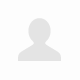
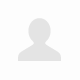

In [83]:
soup = BeautifulSoup(html, 'html.parser')
soup

In [84]:
images = soup.find_all(class_ = '_image _listImage') # 이미지를 나타내는 클래스를 잡아주면 된다.
images

[<img alt="[제주 여행] DAY5 : 제주를 떠나요☘️ 나를 감동시킨 에메랄드빛 바다" class="_image _listImage" data-org-height="165" data-org-width="340" src="https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMjEwMDZfMTk5%2FMDAxNjY0OTk2NDE2MDYw.FYFCZCxfBWZWI3kucGkkF1N04d-k6JnmPhICmnAWx0cg.sCkTEdDo5qiU1OxAvkKTNeuggb4iXFMRoVS3f3rG5ZIg.JPEG.youbreakurrules%2FIMG_6178.JPG&amp;type=l340_165" style="height: 106px; opacity: 1;"/>,
 <img alt="강릉 바다 파도 파랑" class="_image _listImage" data-org-height="453" data-org-width="340" src="https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMjA5MjlfNSAg%2FMDAxNjY0NDQ2MzQxMTUz.CULhgwz7oztLcETaxI0J65MzUm8tNzRKS4X2iIA9Q0sg.eNYn6Ew_i-z0u1evFHPY5M74yMDaN6eAu5fYRLB7qNIg.JPEG.dawonchu99%2FIMG_0723.jpg&amp;type=a340" style="height: 290px; opacity: 1;"/>,
 <img alt="바다가부른다 - 강릉" class="_image _listImage" data-org-height="165" data-org-width="340" src="https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMjEwMTJfMjI0%

In [85]:
from urllib.request import urlopen, urlretrieve

In [86]:
count = 0
for image in images:
    urlretrieve(image['src'], f'./sea/{count}.jpg') # 저장 위치
    count += 1

In [87]:
# 최소코드

In [88]:
driver = webdriver.Chrome('C://Users//admin/chromedriver.exe')

url1 = 'https://search.naver.com/search.naver?where=image&sm=tab_jum&query='
url2 = quote_plus('바다')  #quo는 한글을 처리해주는 함수
url = url1 + url2

driver.get(url)
html = driver.page_source
driver.close()

soup = BeautifulSoup(html, 'html.parser')
images = soup.find_all(class_ = '_image _listImage')

count = 0
for image in images:
    urlretrieve(image['src'], f'./sea/{count}.jpg') # 저장 위치
    count += 1

C:\Users\admin\AppData\Local\Temp\ipykernel_2772\2831824175.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C://Users//admin/chromedriver.exe')


In [ ]:
driver을 다룰때 한 셀에 다 넣어서 실행시키면 문제가 발생할 수 있다.
실행 속도가 빠르기 때문에 받아 오기도 전에 close가 될 수도 있다.

지금 이 코드도 실행시키면 에러는 뜨지 않지만 지정한 폴더에는 아무것도 저장되어 있지 않다.

In [ ]:
드라이브를 텀을 두고 실행시키는 방법
1. time.sleep 2. driver.implicitly_wait()

In [91]:
import time

In [96]:
driver = webdriver.Chrome('C://Users//admin/chromedriver.exe')

url1 = 'https://search.naver.com/search.naver?where=image&sm=tab_jum&query='
url2 = quote_plus('바다')  #quo는 한글을 처리해주는 함수
url = url1 + url2

driver.get(url)
time.sleep(10)

html = driver.page_source
driver.close()

soup = BeautifulSoup(html, 'html.parser')
images = soup.find_all(class_ = '_image _listImage')

count = 0
for image in images:
    urlretrieve(image['src'], f'./sea/{count}.jpg') # 저장 위치
    count += 1

C:\Users\admin\AppData\Local\Temp\ipykernel_2772\3103730384.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C://Users//admin/chromedriver.exe')


In [94]:
driver = webdriver.Chrome('C://Users//admin/chromedriver.exe')

url1 = 'https://search.naver.com/search.naver?where=image&sm=tab_jum&query='
url2 = quote_plus('강아지')  #quo는 한글을 처리해주는 함수
url = url1 + url2

driver.get(url)
driver.implicitly_wait(10)

html = driver.page_source
driver.close()

soup = BeautifulSoup(html, 'html.parser')
images = soup.find_all(class_ = '_image _listImage')

count = 0
for image in images:
    urlretrieve(image['src'], f'./sea/{count}.jpg') # 저장 위치
    count += 1

C:\Users\admin\AppData\Local\Temp\ipykernel_2772\2140122641.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C://Users//admin/chromedriver.exe')


암묵적으로 10초를 기다리는데 데이터를 다 받으면 10초 다 기다리지 않는다.

In [ ]:
driver = webdriver.Chrome('C://Users//admin/chromedriver.exe')

url1 = 'https://search.naver.com/search.naver?where=image&sm=tab_jum&query='
url2 = quote_plus('바다')  #quo는 한글을 처리해주는 함수
url = url1 + url2

driver.get(url)
html = driver.page_source
driver.close()

soup = BeautifulSoup(html, 'html.parser')
images = soup.find_all(class_ = '_image _listImage')

count = 0
for image in images:
    urlretrieve(image['src'], f'./sea/{count}.jpg') # 저장 위치
    count += 1